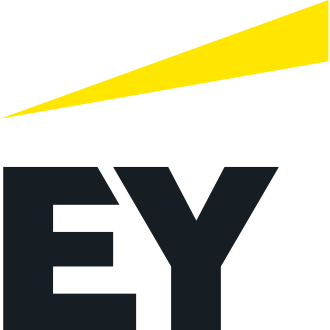

# **Ernst & Young**
This company is a multinational professional services partnership headquartered in London, England. EY is one of the largest professional services networks in the world. Along with Deloitte, KPMG and PricewaterhouseCoopers, it is considered one of the Big Four accounting firms. It primarily provides assurance (which includes financial audit), tax, consulting and advisory services to its clients. Like many of the larger accounting firms in recent years, EY has expanded into markets adjacent to accounting, including strategy, operations, HR, technology, and financial services consulting.

The company has a new client, a company of HR, and wants to have a personal email, only for the staff, in order to that they need a model to define if the email that is recieved is a smap or not.

Thats why they've sent a dataset of the full content of the email including subject, test, etc.

## Getting Started
This are the libraries that have to be install in order the model to work

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import sklearn.model_selection

**Data**: The dataset that the company send is the archive 'Emails content.csv'. It has 3 columns which are: CATEGORY, that is 0 if its a normal mail and 1 if it's a spam email; MESSAGE, that contains the content of the email; and FILE_NAME, that has the id of the messages.

In [145]:
sms = pd.read_csv('spam_ham_dataset.csv')

In [146]:
sms.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [147]:
sms['text'].str.len()

0        327
1         97
2       2524
3        414
4        336
        ... 
5166     534
5167    1114
5168     402
5169     573
5170    1114
Name: text, Length: 5171, dtype: int64

Then it's necessary to look for null values on the dataset.

In [148]:
sms.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [149]:
len(sms)

5171

### Balancing the data
In order to analize this methods it is necessary to balance the data.

In [150]:
sms['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [151]:
spam = sms[sms['label']=='spam']
spam.head()

,Unnamed: 0,label,text,label_num
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
10,4922,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,3799,spam,Subject: report 01405 !\r\nwffur attion brom e...,1
13,3948,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1


In [154]:
non_spam = sms[sms['label']=='ham']
non_spam.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0


In [155]:
spam.shape, non_spam.shape

((1499, 4), (3672, 4))

In [156]:
non_spam = non_spam.sample(spam.shape[0])

In [157]:
spam.shape, non_spam.shape

((1499, 4), (1499, 4))

In [158]:
df = sms
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [159]:
df = non_spam.append(spam, ignore_index = True)
df.head()

,Unnamed: 0,label,text,label_num
0,1654,ham,Subject: re : cornhusker\r\nif the plants beco...,0
1,3604,ham,Subject: re : unify gas month end close - nove...,0
2,3466,ham,Subject: tenaska iv 8 / 01\r\ndarren :\r\nplea...,0
3,34,ham,Subject: phillips petroleum\r\ni wanted to upd...,0
4,3344,ham,Subject: trv notification : ( waha - 06 / 21 /...,0


Data Analysis

In [160]:
df['label_num'].value_counts()

ham     1499
spam    1499
Name: label, dtype: int64

In [161]:
df.head()

,Unnamed: 0,label,text,label_num
0,1654,ham,Subject: re : cornhusker\r\nif the plants beco...,0
1,3604,ham,Subject: re : unify gas month end close - nove...,0
2,3466,ham,Subject: tenaska iv 8 / 01\r\ndarren :\r\nplea...,0
3,34,ham,Subject: phillips petroleum\r\ni wanted to upd...,0
4,3344,ham,Subject: trv notification : ( waha - 06 / 21 /...,0


In [162]:
df['label_num'].str.len()

0       3
1       3
2       3
3       3
4       3
       ..
2993    4
2994    4
2995    4
2996    4
2997    4
Name: label, Length: 2998, dtype: int64

The next plot is supposed to compare the quantity of letter does the email has in contrast of the spam an the non smap ones. But as it seems, they usually have the same amount.

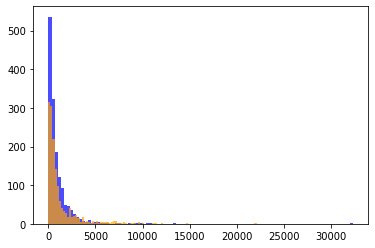

In [169]:
plt.hist(df[df['label']=='ham']['text'].str.len(),bins = 100, alpha = 0.7,color = 'blue')
plt.hist(df[df['label']=='spam']['text'].str.len(),bins = 100, alpha = 0.7, color = 'orange')

plt.show()

### **Data Preparation**
Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

This algorithm tokenize strings and gives an integer id for each possible token, for instance by using white-spaces and punctuation as token separators, 
counts the occurrences of tokens in each document, and normalize and weight with diminishing importance tokens that occur in the majority of samples / documents.

In [177]:
x = df['text']
y = df['label_num']

In [178]:
vectorizer = TfidfVectorizer()

In [179]:
x = vectorizer.fit_transform(x)

In [180]:
x.shape

(2998, 45753)

In [181]:
vectorizer.build_tokenizer()

<function Pattern.findall>

In [182]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [183]:
x

<2998x45753 sparse matrix of type '<class 'numpy.float64'>'
	with 284061 stored elements in Compressed Sparse Row format>

### Data Training

In [251]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (2248, 45753)
x_test:  (750, 45753)
y_train:  (2248,)
y_test:  (750,)


### Support Vector Classification

In [252]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf=GridSearchCV(svc, parameters)

In [254]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [255]:
y_pred = clf.predict(x_test)

In [256]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': SVC(),
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [257]:
confusion_matrix(y_test, y_pred)

array([[359,  20],
       [  0, 371]])

In [258]:
accuracy_score(y_test,y_pred)

0.9733333333333334

In [259]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       379
           1       0.95      1.00      0.97       371

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


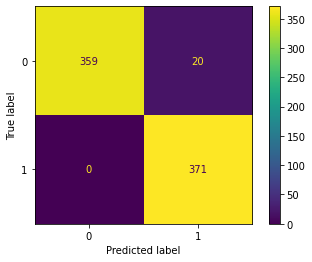

In [260]:
plot_confusion_matrix(clf, x_test, y_test) 

### Decision Tree Classifier


In [261]:
parameters = {'criterion': ('gini', 'entropy', 'log_loss')}
dtc = DecisionTreeClassifier(random_state=0)
clf2=GridSearchCV(dtc, parameters)

In [262]:
clf2.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': DecisionTreeClassifier(random_state=0),
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 0,
 'estimator__splitter': 'best',
 'n_jobs': None,
 'param_grid': {'criterion': ('gini', 'entropy', 'log_loss')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [263]:
clf2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss')})

In [264]:
y_pred2 = clf2.predict(x_test)

In [265]:
confusion_matrix(y_test, y_pred)

array([[359,  20],
       [  0, 371]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


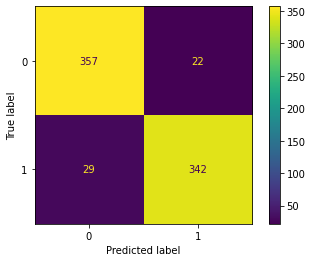

In [266]:
plot_confusion_matrix(clf2, x_test, y_test) 

In [267]:
accuracy_score(y_test,y_pred)

0.9733333333333334

In [268]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       379
           1       0.95      1.00      0.97       371

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



### MLP Classifier

In [269]:
clf3=MLPClassifier(random_state=0)

In [270]:
clf3.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [271]:
clf3.fit(x_train,y_train)

MLPClassifier(random_state=0)

In [272]:
y_pred3 = clf3.predict(x_test)

In [273]:
confusion_matrix(y_test, y_pred3)

array([[368,  11],
       [  1, 370]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


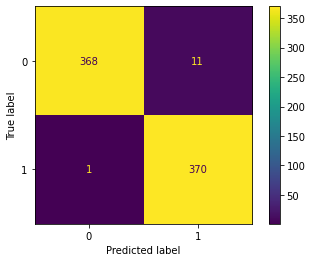

In [274]:
plot_confusion_matrix(clf3, x_test, y_test) 

In [275]:
accuracy_score(y_test,y_pred3)

0.984

In [276]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       379
           1       0.97      1.00      0.98       371

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



## Conclusion

To conclude, the algorithms of Support Vector Classification and Decision Tree Classifier have the best accuracy; but, to my mind, the best model is the one with MLP Classifier, because it adds more analyzing to the result.